# Unsupervised Machine Learning Models

Modules:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import vincent as vin
import seaborn as sb

import time

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from patsy import dmatrix

## data

I will actually create a new dataset by user by song. (Please see the previous notebook for the creation)

In [ ]:
df= pd.read_csv('unsupervised_learning_data.csv', sep=',')
len(df)

In [31]:
#creating an index to look up song information
song_names = df.groupby('song_id').song_titles.first()

In [32]:
song_df=df.groupby('song_id')['song_titles','artist_names'].first()

In [33]:
song_df.head()

,song_titles,artist_names
song_id,,
SOAAEHR12A6D4FB060,Slaves & Bulldozers,Soundgarden
SOAAFUV12AB018831D,Where Do The Children Play? (LP Version),Big Mountain
SOABLAF12AB018E1D9,Lesson Learned,Alice In Chains
SOABVPU12AB018AA22,Conquer Me,Delroy Wilson
SOACEDS12A6701EAAA,Gone To The Movies,Semisonic


In [31]:
df.rating.value_counts().sort_index()

1    300455
2     80299
3      9322
4      2866
5       785
Name: rating, dtype: int64

## Feature Matrix

For unsupervised learning we are going to create a feature matrix.

The class **DictVectorizer** can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators

In [4]:
#first we nee to vectorixe genre_id
from sklearn.feature_extraction import DictVectorizer

categorical_features = df[['genre_id']]
dv = DictVectorizer()
cat_matrix = dv.fit_transform(categorical_features.T.to_dict().values())

Convert numerical values to strings, so patsy will treat them as categorical features

We need all the features to be strings.

This was too many features, it kept on crashing:

```python
df['artist_familiarty'] = df.artist_familiarty.astype(str)
df['artist_hotness'] = df.artist_familiarty.astype(str)
df['song_modes'] = df.artist_familiarty.astype(str)
df['song_time_signatures'] = df.artist_familiarty.astype(str)
df['song_durations'] = df.artist_familiarty.astype(str)
df['song_tempo'] = df.artist_familiarty.astype(str)
df['beats_number'] = df.artist_familiarty.astype(str)
df['song_release_years'] = df.artist_familiarty.astype(str)

X_features = dmatrix('artist_familiarty + artist_hotness + song_modes + song_time_signatures + song_durations + song_tempo + beats_number + song_release_years', data=df.fillna(0), return_type='dataframe')

```

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393727 entries, 0 to 393726
Data columns (total 23 columns):
Unnamed: 0              393727 non-null int64
user_id                 393727 non-null object
song_id                 393727 non-null object
play_count              393727 non-null int64
artist_familiarty       393727 non-null float64
artist_hotness          393727 non-null float64
artist_id               393727 non-null object
artist_names            393727 non-null object
song_durations          393727 non-null float64
song_hotness            393727 non-null float64
song_release_years      393727 non-null int64
song_titles             393727 non-null object
track_id                393727 non-null object
song_keys               393727 non-null int64
song_modes              393727 non-null float64
song_tempo              393727 non-null float64
song_time_signatures    393727 non-null float64
genre_id                393727 non-null object
beats_number            393727 non-null 

In [6]:
for col in df.columns:
    print "%s has %s unique categories" % (col, df[col].nunique())

Unnamed: 0 has 393727 unique categories
user_id has 266346 unique categories
song_id has 1780 unique categories
play_count has 150 unique categories
artist_familiarty has 1089 unique categories
artist_hotness has 1089 unique categories
artist_id has 1066 unique categories
artist_names has 1067 unique categories
song_durations has 1642 unique categories
song_hotness has 876 unique categories
song_release_years has 51 unique categories
song_titles has 1767 unique categories
track_id has 1780 unique categories
song_keys has 12 unique categories
song_modes has 1089 unique categories
song_tempo has 1089 unique categories
song_time_signatures has 1089 unique categories
genre_id has 20 unique categories
beats_number has 1416 unique categories
bars_number has 1071 unique categories
tatum_number has 734 unique categories
rating has 5 unique categories
index has 393727 unique categories


In [7]:
df['artist_familiarty'] = df.artist_familiarty.astype(str)
df['song_keys'] = df.song_keys.astype(str)
df['tatum_number'] = df.tatum_number.astype(str)

In [8]:
X_features = dmatrix('artist_familiarty + song_keys + tatum_number', data=df.fillna(0), return_type='dataframe')

In [ ]:
X_features.head()

**CountVectorizer** implements both tokenization and occurrence counting in a single class

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10)
X_genre = cv.fit_transform(df.genre_id)
#Could also use tfdifVectorizer

In [10]:
from scipy.sparse import hstack

In [ ]:
other_features = df[['artist_familiarty','artist_hotness','song_modes','song_time_signatures',\
                       'song_durations','song_tempo','beats_number','song_release_years']]

You can also use dummier to create the feature matrix.

In [43]:
#dummy_features=pd.get_dummies(other_features)

KeyboardInterrupt: 

In [11]:
X = np.hstack([X_features, X_genre.toarray()])
y = df.rating
n_samples, n_features = X.shape

In [ ]:
X

## Content Filtering

In this approach we create a feature space, where we map the data to compare listeners to songs. 
Each song gets a representation in the space and each listener gets a listener profile.

#### Song Features

In [12]:
uniques, idx = np.unique(df.song_id, return_index=True)
song_features = pd.DataFrame(X[idx, :], index=df.song_id[idx])
print song_features.shape
song_features.head(2)

(1780, 1843)


,0,1,2,3,4,5,6,7,8,9,...,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAEHR12A6D4FB060,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
SOAAFUV12AB018831D,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Listener Profile

In [13]:
listener_features = pd.DataFrame(X * (df.rating.values).reshape(n_samples, 1))

In [14]:
listener_features['listener_profile'] = df.user_id

In [13]:
#listener_features.sparse()

AttributeError: 'DataFrame' object has no attribute 'sparse'

In [15]:
listener_features = listener_features.groupby('listener_profile')[range(n_features)].mean()

In [16]:
listener_features = listener_features.divide(listener_features.sum(axis=1), axis=0)

The kernel dies at this point. Let's try 

from sklearn.preprocessing import scale
data_matrix = scale(data_matrix.todense())

or .sparse()

In [17]:
listener_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266346 entries, 00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e to ffffd330940a2a40754ec0383391f55c6129f48b
Columns: 1843 entries, 0 to 1842
dtypes: float64(1843)
memory usage: 3.7+ GB


In [18]:
listener_features[[0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 266346 entries, 00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e to ffffd330940a2a40754ec0383391f55c6129f48b
Data columns (total 1 columns):
0    266346 non-null float64
dtypes: float64(1)
memory usage: 4.1+ MB


In [19]:
listener_features = listener_features.dropna(how='any')

In [20]:
listener_features.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842
listener_profile,,,,,,,,,,,,,,,,,,,,,
00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0
0000d3c803e068cf1da17724f1674897b2dd7130,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0
0000f88f8d76a238c251450913b0d070e4a77d19,0.2,0,0,0,0,0,0,0,0,0,...,0.066667,0,0,0,0.133333,0.0,0.0,0,0,0
0001d493b98f820a7e37b16b1fa0b31b7eadc4d3,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0
00020e8ba3f9041deed64ec9c60b26ff6bf41c66,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.000000,0.2,0.0,0,0,0
0002236e33c94f6d300fa52a045e0c7ae1e19ccf,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0
000227c5bf4bc34aac7ca21227f452c1f7ae6417,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0
0002b896949cb2899feaed47104406e99eafa983,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0
0002e94348b2543c6e6ccf408b0160d14064e46f,0.2,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0,0.200000,0.0,0.0,0,0,0


#### Song Recommendation

Let's predict user Charlie's next song!!!

In [24]:
df.user_id

0         b64cdd1a0bd907e5e00b39e345194768e330d652
1         951945330eb5df161ac4f97729647514001cd102
2         bd64f193f0f53f09d44ff48fd52830ff2fded392
3         e427f647c231c1bde8881eca5b2f5db9b3bcb2b4
4         02192554db8fe6d17b6309aabb2b7526a2e58534
5         34c327464b7c8eaf912e6ba37cadcb64514b5900
6         453b8c452ef73afd327e7522490be3a464db2ba1
7         9e448d03be35d855a8fba9cf70e8f7ba3d5d3008
8         c805c895d0b2f69c5deb95f829a8b30e6e9e6b9e
9         b87670a903ef43bada1d0e75c3b2d981b90f6697
10        ced8b390f1c4de9b97ad75b3a46b1938efb5def2
11        e8d37d9337aec9dfa73c47fdf04b3f18780ac251
12        08e3f149eb81d427c97a6f0276861ddd26d52db5
13        66c010584fb0b6bc51353dd9840144d995560504
14        de574a0e7ad97d93b0a10a4dc90fa85112d705cd
15        ee7aa84c164038c963cfd02a7e52a5598aa470c3
16        13610ce0628c06f5c11aa6a3f815996d528d6c16
17        94455a44b78ea9072a9d8cbfcd8dde6454077b5e
18        0bb22a12310849b8416cc0682c5a8f5cc9235dde
19        850b3c1c95b96e3705438

In [27]:
df.user_id.value_counts().sort_index().head()

00004fb90a86beb8bed1e9e328f5d9b6ee7dc03e    1
0000d3c803e068cf1da17724f1674897b2dd7130    1
0000f88f8d76a238c251450913b0d070e4a77d19    3
0001d493b98f820a7e37b16b1fa0b31b7eadc4d3    1
00020e8ba3f9041deed64ec9c60b26ff6bf41c66    1
Name: user_id, dtype: int64

In [28]:
user = '0000f88f8d76a238c251450913b0d070e4a77d19'

In [29]:
listener_features.loc[user]

0       0.200000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
          ...   
1813    0.000000
1814    0.000000
1815    0.000000
1816    0.000000
1817    0.000000
1818    0.000000
1819    0.000000
1820    0.000000
1821    0.000000
1822    0.000000
1823    0.000000
1824    0.000000
1825    0.000000
1826    0.000000
1827    0.000000
1828    0.000000
1829    0.000000
1830    0.000000
1831    0.000000
1832    0.000000
1833    0.066667
1834    0.000000
1835    0.000000
1836    0.000000
1837    0.133333
1838    0.000000
1839    0.000000
1840    0.0000

In [35]:
v = listener_features.loc[user].values
M = song_features.values
pred = M.dot(v)

# Now index this vector with the actual beers, so we can understand the values
pred = pd.Series(pred, index=song_features.index, name="predictions") \
    .sort(ascending=False, inplace=False)
pred_name = pd.Series(pred.values, song_names[pred.index], name=pred.name)

print "Top recommendations for %s" % user
print pred_name.head()

print "Bottom  recommendations" % user
print pred_name.tail()

Top recommendations for 0000f88f8d76a238c251450913b0d070e4a77d19
song_titles
I Did it for You              0.600000
Country Day                   0.533333
Red Socks Pugie               0.533333
Missionary Man                0.533333
Burn 'Em Down (LP Version)    0.533333
Name: predictions, dtype: float64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


TypeError: not all arguments converted during string formatting

In [36]:
pred_name

song_titles
I Did it for You                                                              0.600000
Country Day                                                                   0.533333
Red Socks Pugie                                                               0.533333
Missionary Man                                                                0.533333
Burn 'Em Down (LP Version)                                                    0.533333
Hate Zone                                                                     0.533333
Clever Girls Like Clever Boys Much More Than Clever Boys Like Clever Girls    0.533333
Magico                                                                        0.533333
Better Days                                                                   0.533333
Eoarchaean                                                                    0.533333
The Date ( LP Version )                                                       0.533333
Running On The Rocks           

Comparison to actual reviews

In [38]:
my_reviews = df[df.user_id == user].groupby('song_id').rating.mean()\
    .sort(ascending=False, inplace=False)
my_reviews_name = pd.Series(my_reviews.values, index=song_names[my_reviews.index])
print "Top reviewed by %s" % user
print my_reviews_name.head()
print "\nBottom reviewed by %s" % user
print my_reviews_name.tail()

Top reviewed by 0000f88f8d76a238c251450913b0d070e4a77d19
song_titles
Ragoo               1
I Did it for You    1
Lullaby             1
dtype: int64

Bottom reviewed by 0000f88f8d76a238c251450913b0d070e4a77d19
song_titles
Ragoo               1
I Did it for You    1
Lullaby             1
dtype: int64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  if __name__ == '__main__':


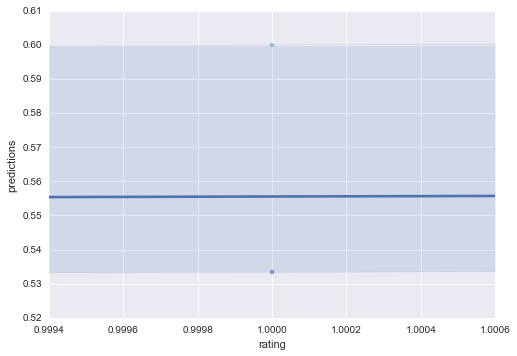

In [39]:
f = sb.regplot(my_reviews, pred[list(my_reviews.index)], scatter_kws=dict(alpha=.4))

## Collaborative Filtering

It seems this is the way to go to recommend a song. 

http://benanne.github.io/2014/08/05/spotify-cnns.html

### Item-based collaborative filtering

In [ ]:
# Create song x listener preference matrix
M2 = df.groupby(['song_id', 'review_profilename']).rating.mean().unstack()
M2 = np.maximum(-1, (M - 3).fillna(0) / 2.)  # scale to -1..+1  (treat "0" scores as "1" scores)
M2.head(2)

In [ ]:
%%time
n_ratings = data.groupby(['song_id', 'user_id']).size()
n_ratings[n_ratings  > 1] = 1  # just keep 1 or 0 for user-song rating
n_ratings = n_ratings.unstack().fillna(0)  # create matrix, fill empty cells with 0
n_ratings = n_ratings.dot(n_ratings.T)  # how many ratings do two beers have in common?

In [ ]:
n_ratings

In [ ]:
%%time
# if we have `ignore_up_to_n` or less common ratings between two songs, just ignore it
ignore_up_to_n = 3
n_ratings = np.maximum(ignore_up_to_n, n_ratings).replace(ignore_up_to_n, np.nan)

In [ ]:
%%time
sim = M.dot(M.T)  # total score in common between two songs
sim = sim / n_ratings  # scale so we get an average score (not a sum)
# note that if we have no common ratings, we get a NaN now

In [ ]:
sim

In [ ]:
n_ratings = data.groupby(['song_id']).size()
songs = n_ratings[n_ratings > 10].index

In [ ]:
n_songs = 5
top = 5
print 
for song in np.random.choice(songs, n_songs):
    print "--", song_names[song], "--"
    sim_songs = sim[song].sort(ascending=False, inplace=False).dropna()
    if len(sim_songs) == 0:
        print "Not enough comparisons"
    else:
        print "MOST  similar:", ", ".join(song_names[list(sim_songs.head(top).index)])
        print "LEAST similar:", ", ".join(song_names[list(sim_songs.tail(top).index)])
    print

In [ ]:
print "Top reviews by %s." % user
print my_reviews_name.head()

In [ ]:
top = 5
favorite_songs = list(my_reviews[my_reviews > 4].index)
pred = sim[favorite_songs].mean(axis=1).dropna().sort(ascending=False, inplace=False)
pred_name = pd.Series(pred.values, song_names[pred.index], name=pred.name)
print "Top recommendations for %s" % user
print pred_name.head()
print "\nBottom  recommendations (don't drink these, %s!)" % user
print pred_name.tail()

In [ ]:
f = sb.regplot(my_reviews, pred[list(my_reviews.index)], scatter_kws=dict(alpha=.4))

### model-based collaborative filtering

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
%%time
n_components = 200   # number of beer classes
svd = TruncatedSVD(n_components)
X_red = svd.fit_transform(M.T)
explained_variance = svd.explained_variance_ratio_.sum()
print "Explained variance of the SVD step: %d%%" % (explained_variance * 100)
print "Dimensions feature matrix (old):", M.T.shape
print "Dimensions feature matrix (new):", X_red.shape

In [ ]:
plt.plot(svd.explained_variance_ratio_.cumsum())
f = plt.ylim(0,1)

In [ ]:
songs = M.index
top_songs = 10
n_rows, n_cols = 2, 3
top_components = n_rows * n_cols
f, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
for no, component in enumerate(svd.components_[:top_components]):
    ax = axes[no / n_cols][no % n_cols]
    s = pd.Series(svd.components_[no], index=song_names[songs].values).sort(inplace=False)[-top_songs:]
    s.plot(kind='barh', ax=ax, title="Component %d\nexplained variance %4.1f" % 
           (no, 100 * svd.explained_variance_ratio_[no]))
f = plt.tight_layout()

In [ ]:
userid = list(M.columns).index(user)
recs = pd.Series(X_red[userid])
f = recs.sort(inplace=False)[-10:].plot(
    kind='barh', title='Top recommended categories for %s' % user)

In [ ]:
songs_from_top_category = pd.Series(svd.components_[recs.argmax()], index=song_names[songs].values)
print "Songs from top recommended category for %s:" % user,
print ', '.join(songs_from_top_category.sort(inplace=False)[-top_songs:].index)

In [ ]:
song_recs = X_red[userid].dot(svd.components_)
song_recs = pd.Series(song_recs, index=song_names[songs].values)
print "Beers recommended for %s:" % user,
print ', '.join(song_recs.sort(inplace=False)[-top_songs:].index)

In [ ]:
pred = pd.Series(recs.dot(svd.components_), index=songs)
f = sb.regplot(my_reviews, pred[list(my_reviews.index)], scatter_kws=dict(alpha=.4))

## K-means

In [ ]:
data_matrix = hstack([cat_matrix, other_features])
data_matrix

In [ ]:
from sklearn.preprocessing import scale

data_matrix = scale(data_matrix.todense())

In [ ]:
from sklearn.cluster import KMeans

clustering_model = KMeans(n_clusters = 25)
clustering_model.fit(data_matrix)

clusters = clustering_model.predict(data_matrix)

clusters

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
df['genre_id'].value_counts()

In [ ]:
results = pd.DataFrame({ 'cluster' : clusters, 'genre_id' : df['genre_id']})
cluster_counts = results.groupby('cluster')['genre_id'].value_counts()

In [ ]:
results

In [ ]:
cluster_counts

In [ ]:
for i in xrange(len(cluster_counts)):
    print "Cluster " ,i
    print cluster_counts[i]
    print